In [2]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io import wavfile
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

In [4]:
SAMPLING_RATE = 44100
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x*freq
    y = np.sin((2*np.pi)*frequencies)
    return x, y



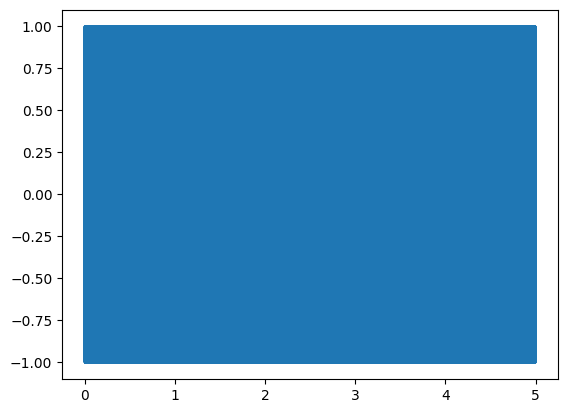

In [12]:
sin_x, sin_y = generate_sine_wave(5000, SAMPLING_RATE, 5)
plt.plot(sin_x, sin_y)
plt.show()

In [48]:
ipd.Audio(sin_y, rate=SAMPLING_RATE)
ipd.Audio(sin_y, rate=SAMPLING_RATE)
write("team1003-sin.wav",SAMPLING_RATE,sin_y)

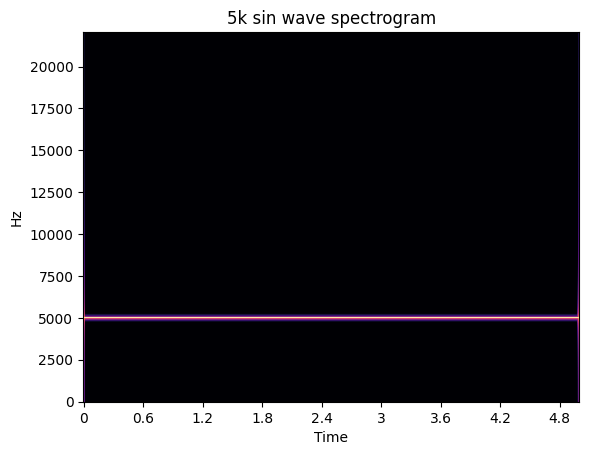

<Figure size 500x500 with 0 Axes>

In [15]:
fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(sin_y)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=SAMPLING_RATE, ax=ax)
ax.set(title='5k sin wave spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

In [38]:
SAMPLING_RATE = 44100
def generate_chirp_wave(freq_max, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = np.linspace(0, freq_max//2, sample_rate*duration, endpoint=False)
    frequencies = np.multiply(x, frequencies)
    y = np.sin((2*np.pi)*frequencies)
    return x, y

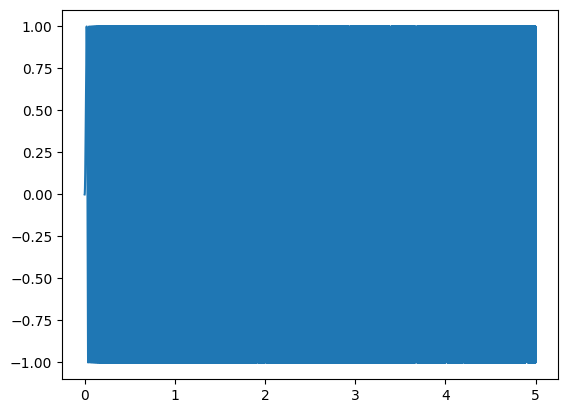

In [39]:
chirp_x, chirp_y = generate_chirp_wave(5000, SAMPLING_RATE, 5)
plt.plot(chirp_x, chirp_y)
plt.show()

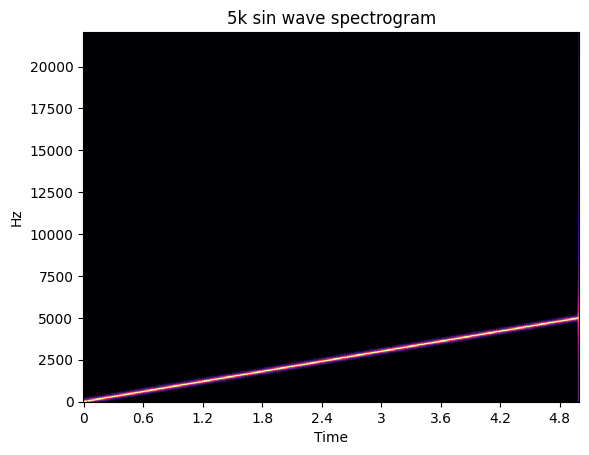

<Figure size 500x500 with 0 Axes>

In [41]:
fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(chirp_y)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=SAMPLING_RATE, ax=ax)
ax.set(title='5k sin wave spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

In [55]:
ipd.Audio(chirp_y, rate=SAMPLING_RATE)
write("team1003-chirp.wav",SAMPLING_RATE,chirp_y)

44100


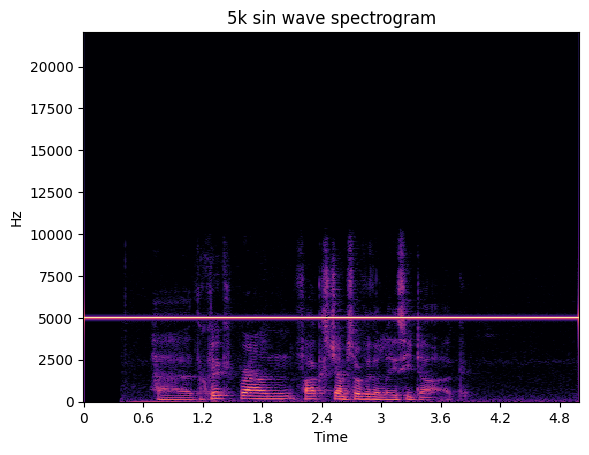

<Figure size 500x500 with 0 Axes>

In [57]:
lazydog, srLazy = librosa.load('../project1/lazydog.wav', sr=SAMPLING_RATE)

print(srLazy)

combined = np.add(lazydog, sin_y)

fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(combined)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=SAMPLING_RATE, ax=ax)
ax.set(title='5k sin wave spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

ipd.Audio(combined, rate=SAMPLING_RATE)
write("team1003-speechchirp.wav",SAMPLING_RATE,combined)

from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from pylab import clf

order = 3
fc =4000 # cutoff
b, a = signal.butter(order, fc, btype='lowpass')
filteredSignal = signal.filtfilt(b, a, data)

In [76]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from pylab import clf

sos = signal.iirfilter(4,4000/SAMPLING_RATE,btype ='low',analog=False, ftype ='butter',output='sos')
filtered = signal.sosfilt(sos, combined)

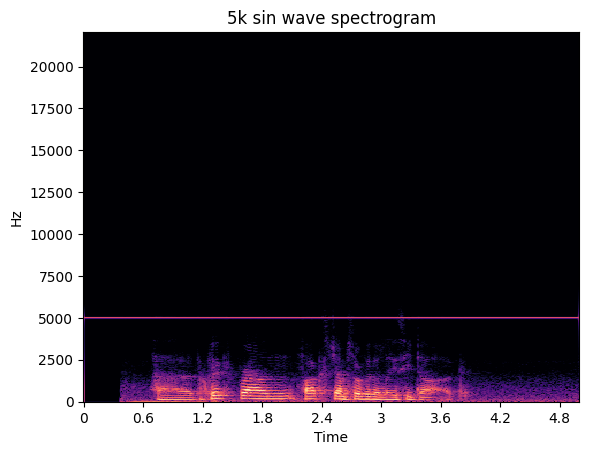

<Figure size 500x500 with 0 Axes>

In [77]:
fig, ax = plt.subplots()
freq = librosa.amplitude_to_db(np.abs(librosa.stft(filtered)), ref=np.max)
librosa.display.specshow(freq, y_axis='linear', x_axis='time',sr=SAMPLING_RATE, ax=ax)
ax.set(title='5k sin wave spectrogram')
ax.label_outer()
fig = plt.figure(figsize=(5, 5))

ipd.Audio(filtered, rate=SAMPLING_RATE)
write("team1003-filtered.wav",SAMPLING_RATE,filtered)